In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import datetime as dt 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [83]:
bhData = pd.read_excel('BHData.xlsx').iloc[:-1,:]
bhData['Stake'] = bhData['Value'] / sum(bhData['Value'])
bhData

,Company,Symbol,Holdings,Price,Value,Stake
0,American Airlines Group Inc,AAL,0,16.64,0,0.000000
1,Apple Inc.,AAPL,250866566,354.99,89055122264,0.408346
2,"Amazon.com, Inc.",AMZN,533300,2682.94,1430811902,0.006561
3,American Express Company,AXP,151610700,103.00,15615902100,0.071604
4,Axalta Coating Systems Ltd,AXTA,24070000,22.66,545426200,0.002501
5,Bank of America Corp,BAC,947760000,25.03,23722432800,0.108775
6,Biogen Inc,BIIB,643022,264.26,169924994,0.000779
7,Bank of New York Mellon Corp,BK,88130897,38.71,3411547023,0.015643
8,Charter Communications Inc,CHTR,5426609,531.30,2883157362,0.013220
9,Costco Wholesale Corporation,COST,4333363,300.89,1303865593,0.005979


In [104]:
data = pd.read_csv('WBStocks.csv')
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data.PRC[data.PRC < 0] *= -1
data['AdjP'] = data['PRC'] / data['CFACPR']
data['Ret'] = np.log(data['AdjP'] / data['AdjP'].shift())
data

/Users/Chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PERMNO,date,TICKER,PERMCO,PRC,CFACPR,AdjP,Ret
0,11308,1990-01-02,KO,20468,78.00000,16.0,4.875000,NaN
1,11308,1990-01-03,KO,20468,76.87500,16.0,4.804688,-0.014528
2,11308,1990-01-04,KO,20468,76.50000,16.0,4.781250,-0.004890
3,11308,1990-01-05,KO,20468,75.87500,16.0,4.742188,-0.008203
4,11308,1990-01-08,KO,20468,77.50000,16.0,4.843750,0.021191
...,...,...,...,...,...,...,...,...
323411,92611,2019-12-24,V,52983,187.57001,1.0,187.570010,0.002616
323412,92611,2019-12-26,V,52983,189.16000,1.0,189.160000,0.008441
323413,92611,2019-12-27,V,52983,189.39000,1.0,189.390000,0.001215
323414,92611,2019-12-30,V,52983,187.83000,1.0,187.830000,-0.008271


In [112]:
list(set(data.TICKER))
inData = data[data.TICKER.isin(bhData.Symbol)]
inData

,PERMNO,date,TICKER,PERMCO,PRC,CFACPR,AdjP,Ret
0,11308,1990-01-02,KO,20468,78.00000,16.0,4.875000,NaN
1,11308,1990-01-03,KO,20468,76.87500,16.0,4.804688,-0.014528
2,11308,1990-01-04,KO,20468,76.50000,16.0,4.781250,-0.004890
3,11308,1990-01-05,KO,20468,75.87500,16.0,4.742188,-0.008203
4,11308,1990-01-08,KO,20468,77.50000,16.0,4.843750,0.021191
...,...,...,...,...,...,...,...,...
323411,92611,2019-12-24,V,52983,187.57001,1.0,187.570010,0.002616
323412,92611,2019-12-26,V,52983,189.16000,1.0,189.160000,0.008441
323413,92611,2019-12-27,V,52983,189.39000,1.0,189.390000,0.001215
323414,92611,2019-12-30,V,52983,187.83000,1.0,187.830000,-0.008271


In [172]:
len(set(data.PERMCO)), len(set(data.PERMNO))

(74, 82)

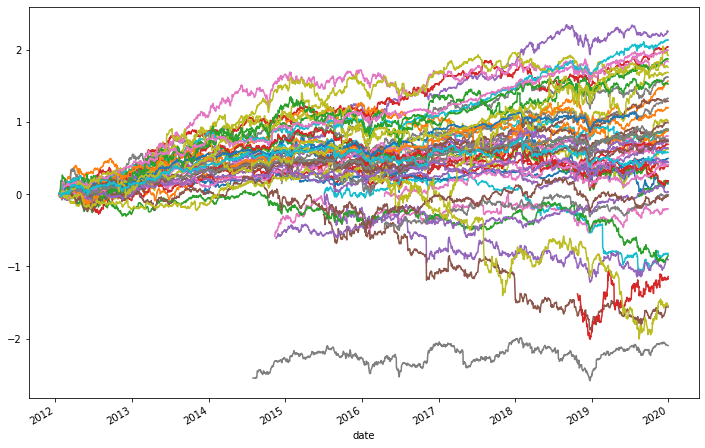

In [107]:
rets = data.pivot_table('Ret', 'date', 'TICKER').sort_index()
rets.iloc[-2000:,:].cumsum().plot(legend=None, figsize=(12,8))

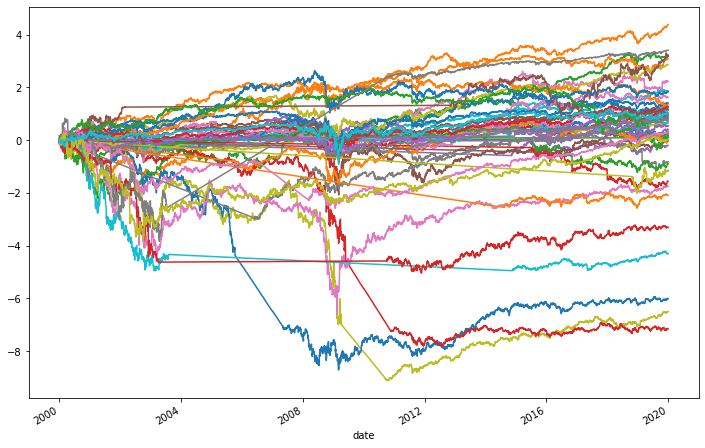

In [148]:
inRets = inData.pivot_table('Ret', 'date', 'TICKER').sort_index()
inRets.iloc[-5031:,:].fillna(0,limit=2).cumsum().interpolate().dropna().plot(legend=None, figsize=(12,8))

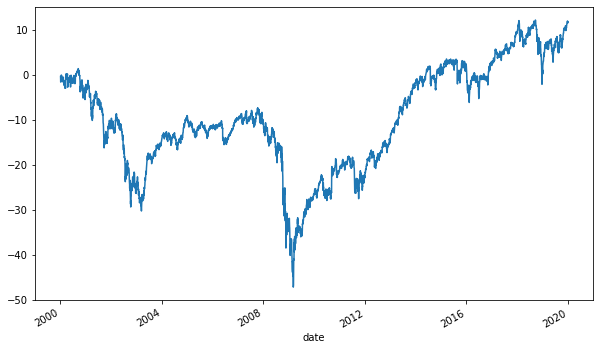

In [166]:
#pd.Series((inRets.values * bhData.Stake.values).sum(axis=1)).cumsum().plot()
inRets.iloc[-5031:,:].fillna(0,limit=2).sum(axis=1).cumsum().plot(legend=None, figsize=(10,6))

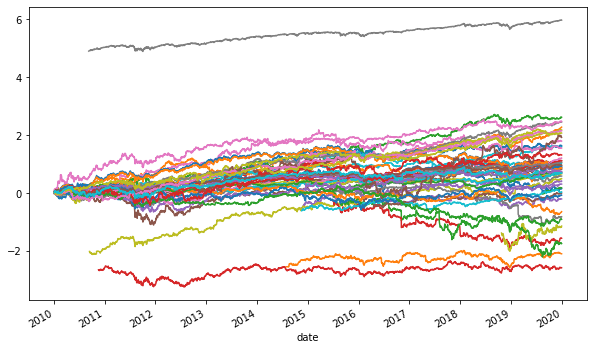

In [169]:
inRets.iloc[-5031:,:]
inRets.iloc[-2516:,:].fillna(0,limit=2).cumsum().plot(legend=None, figsize=(10,6))

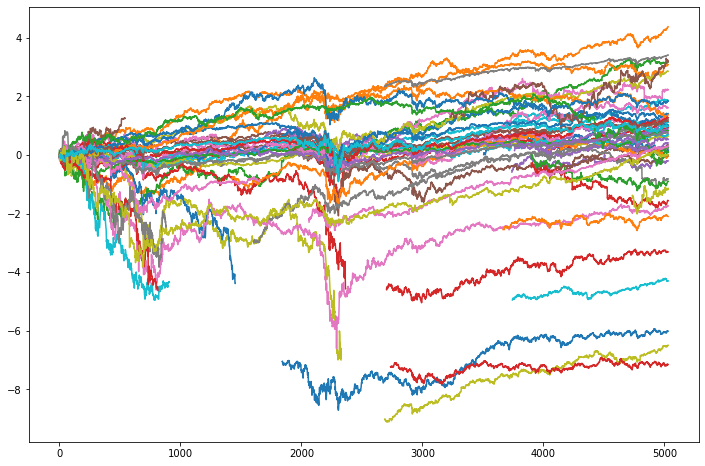

In [192]:
inRets.iloc[-5031:,:].to_csv('BH2000.csv')
pd.read_csv('BH2000.csv').iloc[:,1:].cumsum().plot(legend=None, figsize=(12,8))

In [186]:
bhWeights = bhData['Stake']
bhWeights.to_csv('bhWeights.csv', index=False)
pd.read_csv('bhWeights.csv')

,Stake
0,0.000000
1,0.408346
2,0.006561
3,0.071604
4,0.002501
5,0.108775
6,0.000779
7,0.015643
8,0.013220
9,0.005979


In [182]:
mrgd = pd.merge(bhData, data[['TICKER', 'PERMCO']], left_on='Symbol', right_on='TICKER')
data[data['PERMCO'].isin(mrgd['PERMCO'])]

,PERMNO,date,TICKER,PERMCO,PRC,CFACPR,AdjP,Ret
0,11308,1990-01-02,KO,20468,78.00000,16.0,4.875000,NaN
1,11308,1990-01-03,KO,20468,76.87500,16.0,4.804688,-0.014528
2,11308,1990-01-04,KO,20468,76.50000,16.0,4.781250,-0.004890
3,11308,1990-01-05,KO,20468,75.87500,16.0,4.742188,-0.008203
4,11308,1990-01-08,KO,20468,77.50000,16.0,4.843750,0.021191
...,...,...,...,...,...,...,...,...
323411,92611,2019-12-24,V,52983,187.57001,1.0,187.570010,0.002616
323412,92611,2019-12-26,V,52983,189.16000,1.0,189.160000,0.008441
323413,92611,2019-12-27,V,52983,189.39000,1.0,189.390000,0.001215
323414,92611,2019-12-30,V,52983,187.83000,1.0,187.830000,-0.008271


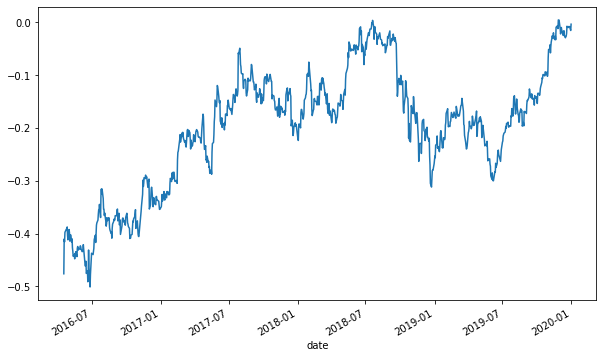

In [199]:
inRets['LSXMK'].cumsum().plot(figsize=(10,6))

In [201]:
print(bhData.to_latex())

\begin{tabular}{lllrrrr}
\toprule
{} &                                          Company & Symbol &   Holdings &    Price &        Value &     Stake \\
\midrule
0  &                      American Airlines Group Inc &    AAL &          0 &    16.64 &            0 &  0.000000 \\
1  &                                       Apple Inc. &   AAPL &  250866566 &   354.99 &  89055122264 &  0.408346 \\
2  &                                 Amazon.com, Inc. &   AMZN &     533300 &  2682.94 &   1430811902 &  0.006561 \\
3  &                         American Express Company &    AXP &  151610700 &   103.00 &  15615902100 &  0.071604 \\
4  &                       Axalta Coating Systems Ltd &   AXTA &   24070000 &    22.66 &    545426200 &  0.002501 \\
5  &                             Bank of America Corp &    BAC &  947760000 &    25.03 &  23722432800 &  0.108775 \\
6  &                                       Biogen Inc &   BIIB &     643022 &   264.26 &    169924994 &  0.000779 \\
7  &                 